Loading cat images...
Error loading D:\PYTHON\internship\ML-infosys\PetImages\Cat\10125.jpg: output_shape length cannot be smaller than the image number of dimensions
Error loading D:\PYTHON\internship\ML-infosys\PetImages\Cat\10404.jpg: attempt to seek outside sequence
Error loading D:\PYTHON\internship\ML-infosys\PetImages\Cat\10501.jpg: output_shape length cannot be smaller than the image number of dimensions
Error loading D:\PYTHON\internship\ML-infosys\PetImages\Cat\10820.jpg: output_shape length cannot be smaller than the image number of dimensions
Loading dog images...
Error loading D:\PYTHON\internship\ML-infosys\PetImages\Dog\10158.jpg: output_shape length cannot be smaller than the image number of dimensions
Error loading D:\PYTHON\internship\ML-infosys\PetImages\Dog\10401.jpg: output_shape length cannot be smaller than the image number of dimensions
Error loading D:\PYTHON\internship\ML-infosys\PetImages\Dog\10747.jpg: output_shape length cannot be smaller than the image num

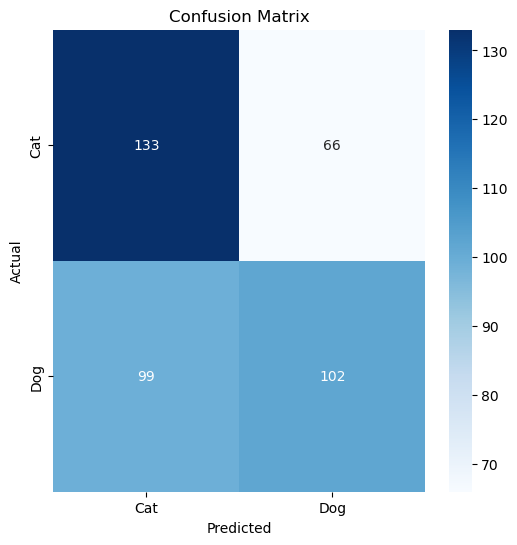

In [6]:
# https://www.kaggle.com/c/dogs-vs-cats/data
# Take Dataset from here and downlaod it, I didn't downlaod becasue it was 900 MB


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset paths (you'll need to download and extract the dataset first)
# Dataset: https://www.kaggle.com/c/dogs-vs-cats/data
train_dir = 'D:\\PYTHON\internship\\ML-infosys\\PetImages'  # Directory containing training images
test_dir = 'D:\\PYTHON\\internship\\ML-infosys\\test'  # Directory containing test images

# Function to load and preprocess images
def load_images(directory, label, max_samples=1000, img_size=(64, 64)):
    images = []
    labels = []
    count = 0
    
    for filename in os.listdir(directory):
        if count >= max_samples:
            break
            
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            try:
                # Read and resize image
                img = imread(img_path)
                img = resize(img, img_size)
                
                # Flatten the image and normalize pixel values
                img = img.flatten() / 255.0
                
                images.append(img)
                labels.append(label)
                count += 1
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

# Load cat and dog images (using smaller subset for demo purposes)
print("Loading cat images...")
cat_images, cat_labels = load_images(os.path.join(train_dir, "Cat"), label=0, max_samples=1000)
print("Loading dog images...")
dog_images, dog_labels = load_images(os.path.join(train_dir, "Dog"), label=1, max_samples=1000)


# Combine datasets
X = np.concatenate((cat_images, dog_images))
y = np.concatenate((cat_labels, dog_labels))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction (to make SVM training faster)
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=100, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create and train SVM classifier
print("Training SVM classifier...")
svm_classifier = SVC(kernel='rbf', C=10, gamma=0.001, random_state=42)
svm_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cat', 'Dog'], 
            yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to test individual images
def predict_image(image_path, model, pca, img_size=(64, 64)):
    img = imread(image_path)
    img_resized = resize(img, img_size)
    plt.imshow(img_resized)
    plt.axis('off')
    
    # Preprocess the image
    img_flat = img_resized.flatten() / 255.0
    img_pca = pca.transform([img_flat])
    
    # Make prediction
    pred = model.predict(img_pca)
    class_name = 'Dog' if pred[0] == 1 else 'Cat'
    plt.title(f"Prediction: {class_name}")
    plt.show()

# Test with sample images (replace with your actual image paths)
# print("\nTesting with sample images...")
# predict_image('D:\\PYTHON\\internship\\ML-infosys\\test\\cats\\cat.0', svm_classifier, pca)  # Replace with actual test image path
# predict_image('D:\\PYTHON\\internship\\ML-infosys\\test\\dogs\\dog.0', svm_classifier, pca)  # Replace with actual test image path